In [1]:
# IMPORTED ADDTIONAL PACKAGES
%matplotlib inline

from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from scipy.stats import zscore

import pandas as pd
import os
import numpy as np

import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
# CHECK UTILIZATION OF  GPU
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

# Transportation Network Providers - Drivers

In [3]:
# IMPORT ALL DATA FROM .CSV INTO DATAFRAME
df_Drivers = pd.read_csv("Transportation_Network_Providers_-_Drivers.csv") 
df_Drivers.describe()

C:\Users\Vik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NUMBER_OF_TRIPS
count,4.809957e+06
mean,5.894990e+01
std,1.099643e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+01
max,9.990000e+02


In [4]:
df_Drivers.head()

,MONTH_REPORTED,DRIVER_START_MONTH,CITY,STATE,ZIP,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2016-08,2015-12,Aurora,IL,60505,342.0,False
1,2018-01,2017-02,Chicago,IL,60612,391.0,True
2,2018-01,2015-03,Dolton,IL,60419,371.0,True
3,2017-09,2017-07,Eilmette,IL,60091,251.0,False
4,2018-06,2018-02,Chicago,IL,60606,332.0,False


# definition of each column
![title](Drivers_INFO.PNG)

All drivers reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of the licensing process and routine reporting required by ordinance. Inclusion of a driver in a monthly report indicates that the driver was eligible for trips in Chicago in that month for at least one day, regardless of whether he or she actually provided any rides. If a driver is eligible in multiple months, which is common, he or she will have records in each of these reporting months. 

As of the creation of this dataset, there have been four TNPs licensed to operate in Chicago, although never more than three at any given time and currently three. Drivers reported by more than one company in the same month are combined and the MULTIPLE_TNPS column is marked as TRUE. However, the matching process is imperfect so not all such drivers are necessarily identified. Similarly, matching between the licensing and routine reporting databases is imperfect, creating potential for occasional errors.

The reporting is done on a monthly basis, as indicated in the MONTH_REPORTED column. However, starting in 2018, the reports are batched and files for all three months in a quarter are delivered to the City of Chicago at the end of each quarter. Due to an issue in this transition, some vehicle records for Q2 2018 (April-June) were reported for the quarter as a whole, rather than for individual months. For purposes of this dataset, those records have been assigned to 2018-06 (June). Therefore, some caution in interpreting this month and the quarter as a whole is advised.

In [21]:
grouped_city = df_Drivers[['CITY','NUMBER_OF_TRIPS']].dropna().groupby(['CITY']).agg(['mean','min','max'])
grouped_city.head()

NUMBER_OF_TRIPS             
                       mean   min    max
CITY                                    
Aacworth           0.000000   0.0    0.0
Abbott Park      134.068966   3.0  241.0
Aberdeen         111.500000  28.0  195.0
Abilene            0.000000   0.0    0.0
Abingdon          11.000000  11.0   11.0

In [17]:
grouped_zip = df_Drivers[['ZIP','NUMBER_OF_TRIPS']].dropna().groupby(['ZIP']).agg(['mean','min','max'])
grouped_zip.head()

NUMBER_OF_TRIPS            
                  mean  min    max
ZIP                               
1960.0       68.565217  0.0  342.0
2139.0       15.714286  0.0   84.0
2148.0       13.000000  0.0   27.0
2152.0       15.000000  0.0  122.0
2170.0        0.000000  0.0    0.0

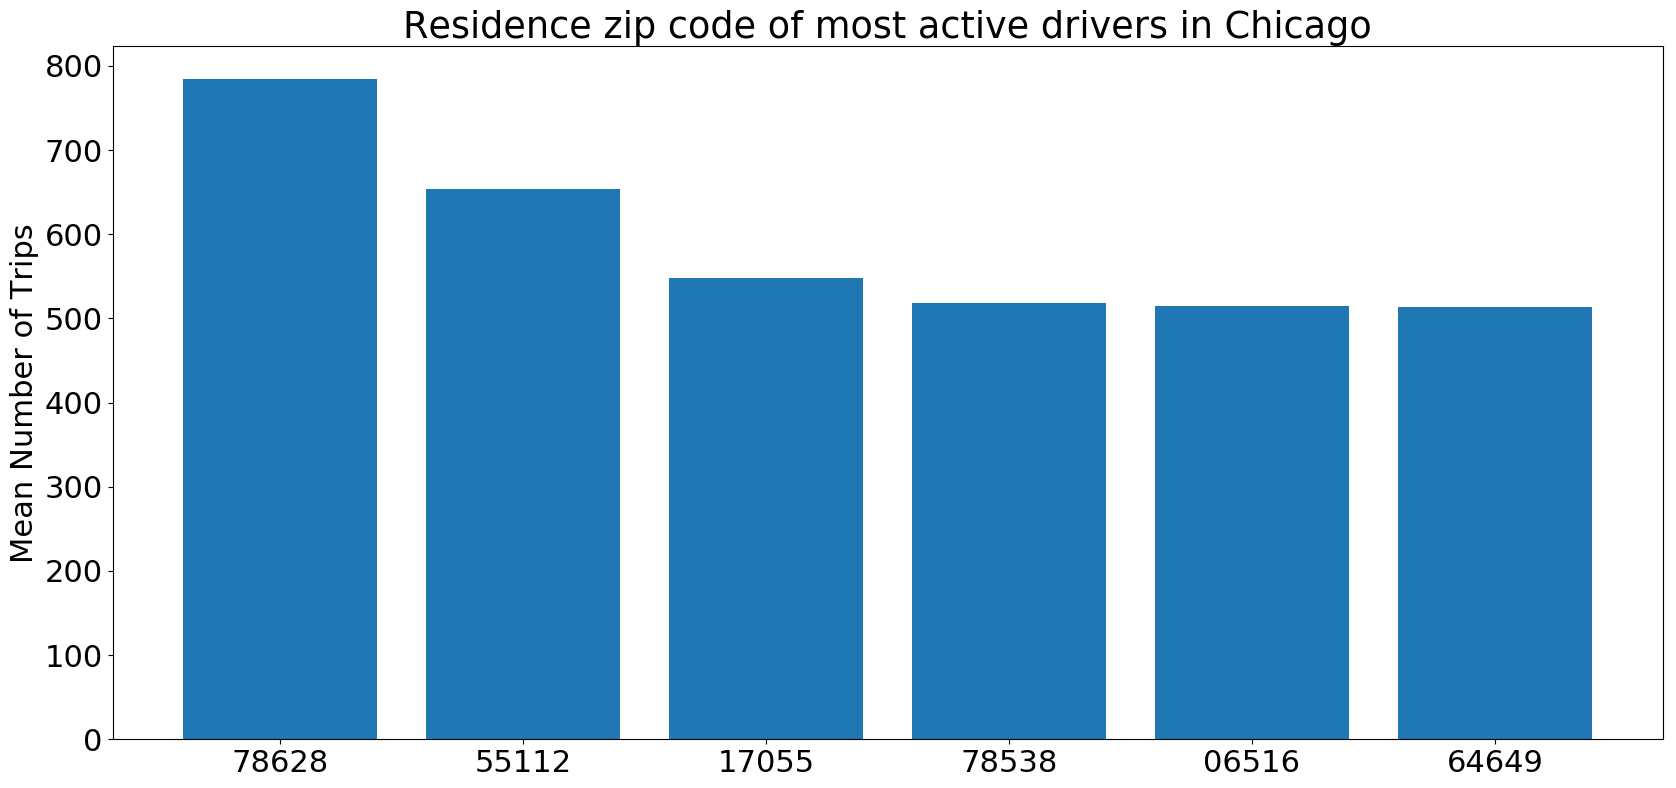

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = grouped_zip['NUMBER_OF_TRIPS']['mean'].nlargest(6).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped_zip['NUMBER_OF_TRIPS']['mean'].nlargest(6)

plt.figure(figsize=(20, 9))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Residence zip code of most active drivers in Chicago')

plt.show()

## The top 3 spots are for city in Texas, Minnesota, Pennsylvania, Texas, Connecticut and Missouri. Surprisingly! top active drivers do not hail from Chicago and seems like they moved to chicago from their relatively small city of residence for better rideshare opportunities since large concentrated population in Chicago metropolitan city. 

## Hence, it will be useful to find out ways in which their income can further be increased.

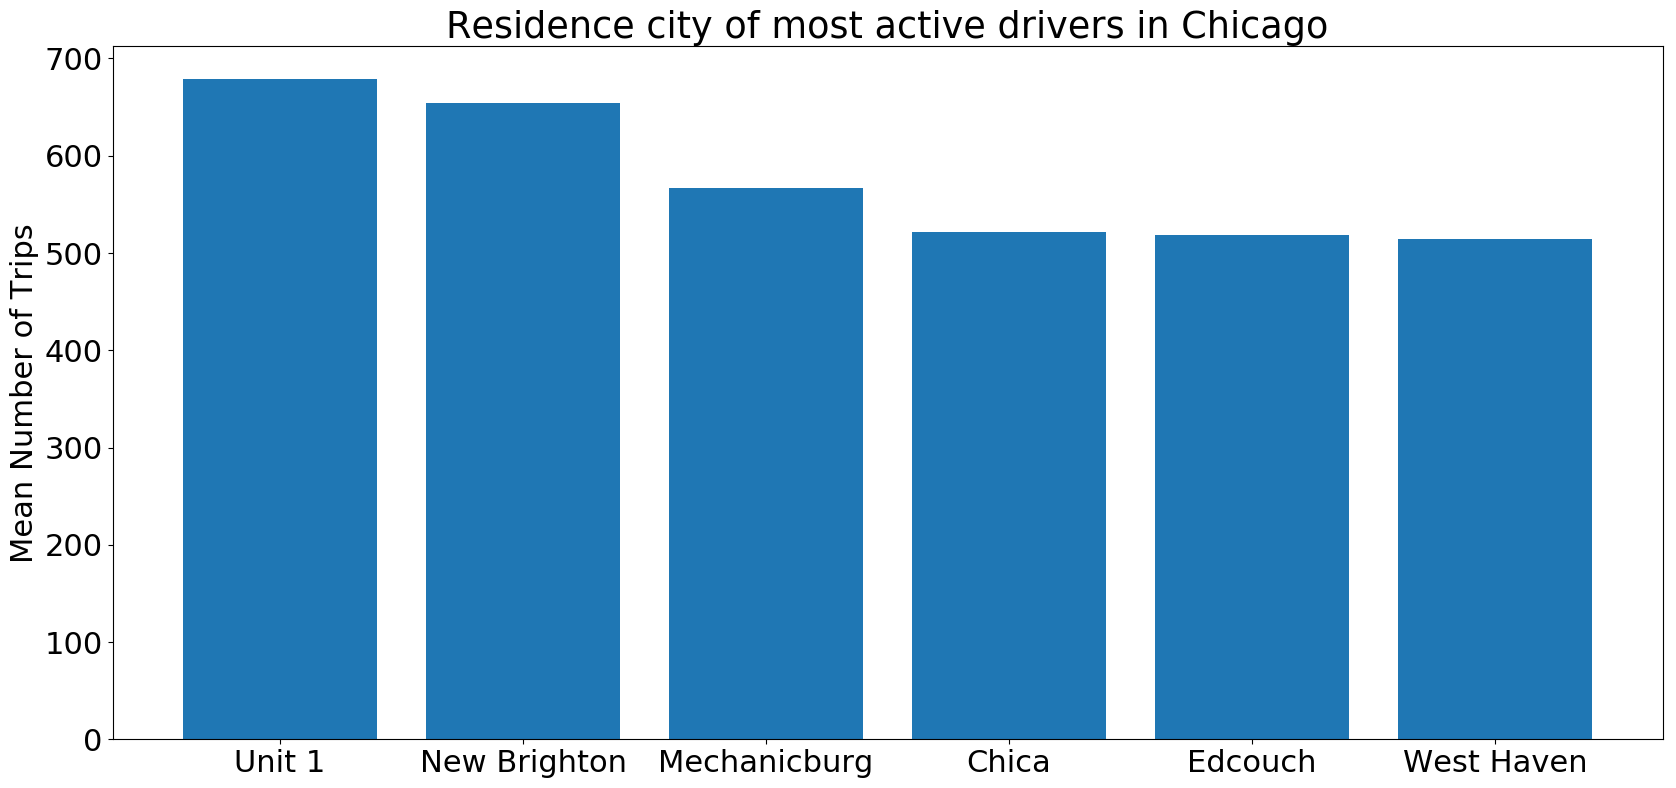

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = grouped_city['NUMBER_OF_TRIPS']['mean'].nlargest(6).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped_city['NUMBER_OF_TRIPS']['mean'].nlargest(6)

plt.figure(figsize=(20, 9))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Residence city of most active drivers in Chicago')

plt.show()

## Similar information as before is obtained. Most active drivers hail from cities outside Illinois state! 

# ---------------------------------------------------------------------------------------------------

# Transportation Network Providers - Vehicles

In [23]:
df_Vehicles = pd.read_csv("Transportation_Network_Providers_-_Vehicles.csv") 
df_Vehicles.describe()

,YEAR,NUMBER_OF_TRIPS
count,4.807018e+06,4.803369e+06
mean,2.011635e+03,5.994858e+01
std,1.328926e+01,1.082885e+02
min,0.000000e+00,0.000000e+00
25%,2.009000e+03,0.000000e+00
50%,2.013000e+03,5.000000e+00
75%,2.015000e+03,7.400000e+01
max,2.017700e+04,9.990000e+02


In [24]:
df_Vehicles.head()

,MONTH_REPORTED,STATE,MAKE,MODEL,COLOR,YEAR,LAST_INSPECTION_MONTH,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2017-09,IL,Nissan,Pathfinder,Red,2016.0,2017-06,NaN,True
1,2016-10,IL,Nissan,Altima,NaN,2016.0,NaN,NaN,True
2,2018-01,IL,Nissan,Altima,Gray,2014.0,2017-10,NaN,True
3,2015-12,IL,Toyota,Prius,NaN,2010.0,NaN,0.0,False
4,2017-10,IL,Toyota,Camry,Gray,2012.0,2017-09,NaN,True


# definition of each column
![title](Vehicles_INFO_1.PNG)

All vehicles reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of routine reporting required by ordinance. Inclusion of a vehicle in a monthly report indicates that the vehicle was eligible for trips in Chicago in that month for at least one day, regardless of whether it actually provided any rides. If a vehicle is eligible in multiple months, which is common, it will have records in each of these reporting months. 

As of the creation of this dataset, there have been four TNPs licensed to operate in Chicago, although never more than three at any given time and currently three. Vehicles reported by more than one company in the same month are combined and the MULTIPLE_TNPS column is marked as TRUE. However, the matching process is imperfect so not all such vehicles are necessarily identified. 

Information on last inspection date was not required before September 2017 so will not be found in older records. 

The reporting is done on a monthly basis, as indicated in the MONTH_REPORTED column. However, starting in 2018, the reports are batched and files for all three months in a quarter are delivered to the City of Chicago at the end of each quarter. Due to an issue in this transition, some vehicle records for Q2 2018 (April-June) were reported for the quarter as a whole, rather than for individual months. For purposes of this dataset, those records have been assigned to 2018-06 (June). Therefore, some caution in interpreting this month and the quarter as a whole is advised.

NUMBER_OF_TRIPS            
                    mean  min    max
MODEL                               
1 Series        0.333333  0.0    1.0
1/3/00         13.750000  0.0   44.0
10/26/00       24.250000  0.0   58.0
100            30.785714  0.0  155.0
121            48.710526  0.0  215.0

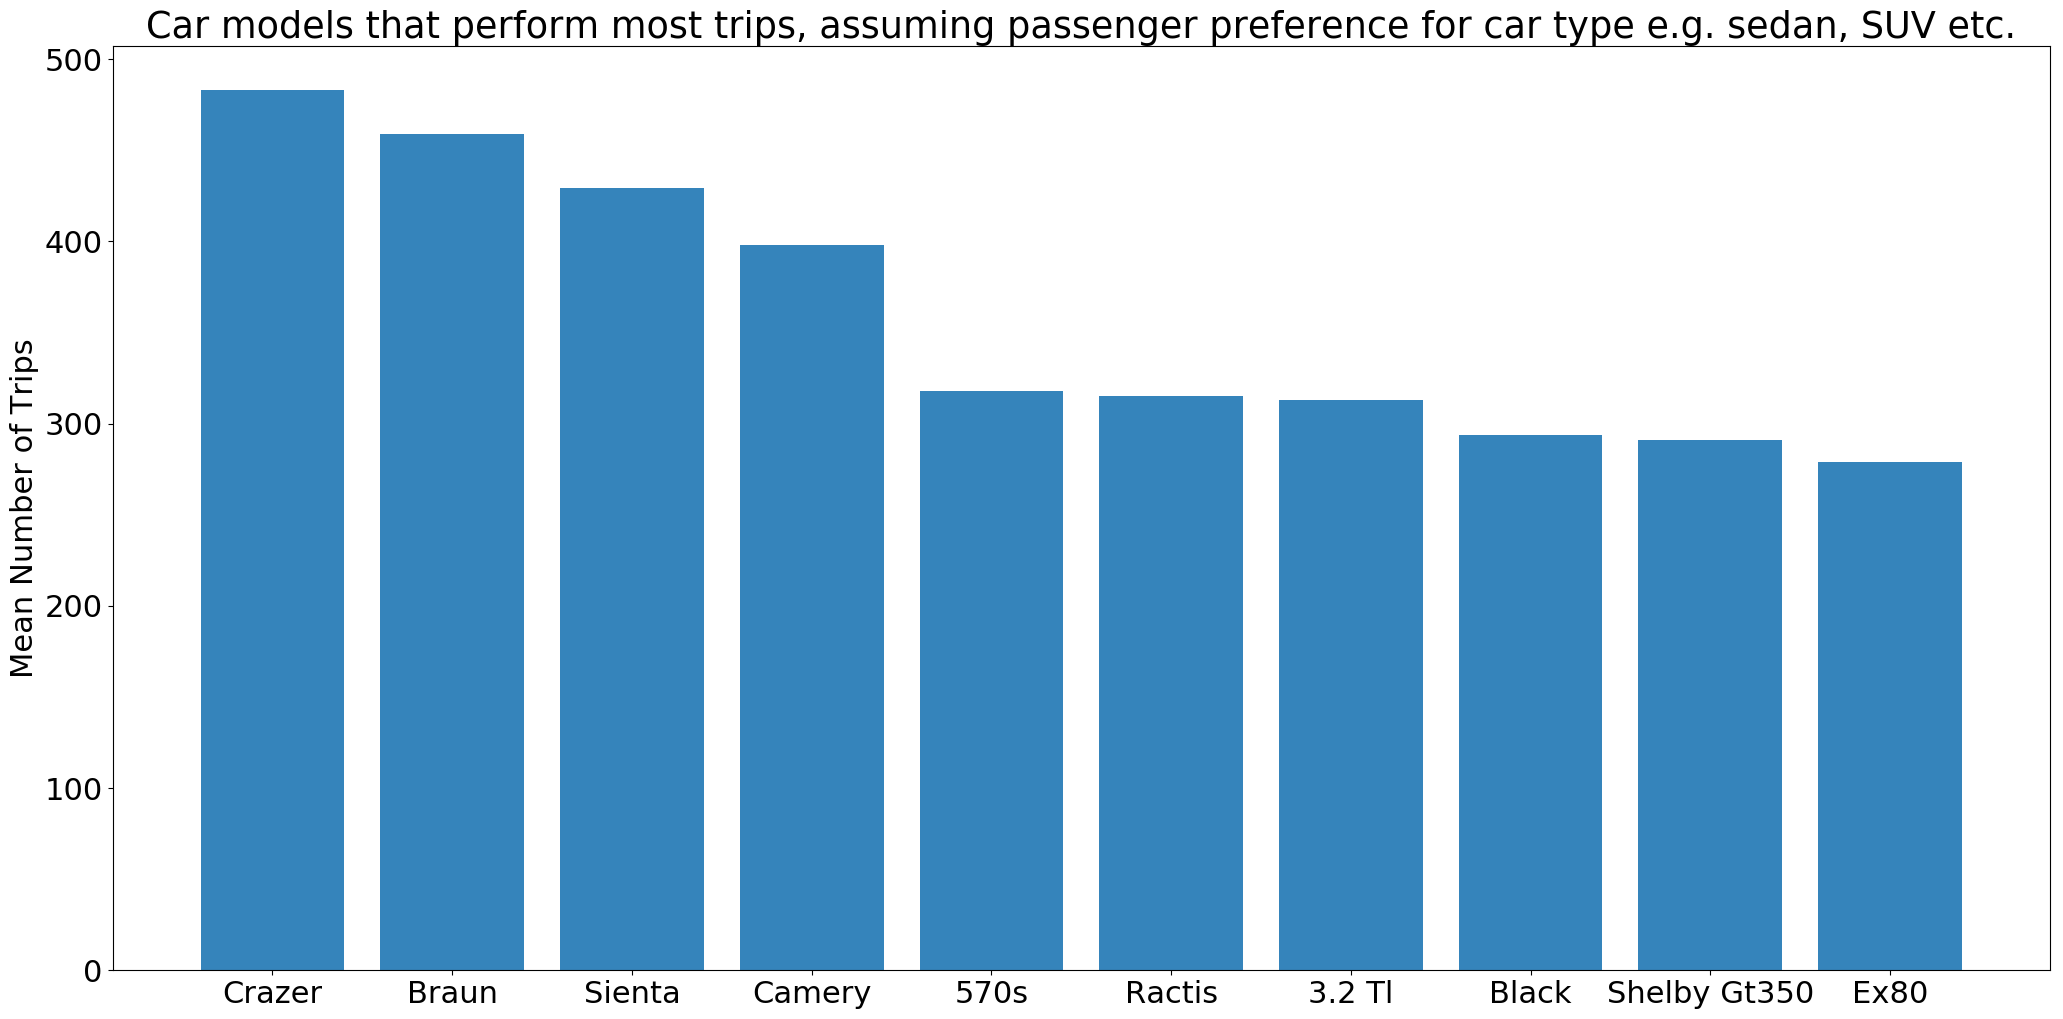

In [28]:
grouped_model = df_Vehicles[['MODEL','NUMBER_OF_TRIPS']].dropna().groupby(['MODEL']).agg(['mean','min','max'])
display(grouped_model.head())

objects = grouped_model['NUMBER_OF_TRIPS']['mean'].nlargest(10).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped_model['NUMBER_OF_TRIPS']['mean'].nlargest(10)

plt.figure(figsize=(25, 12))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Car models that perform most trips, assuming passenger preference for car type e.g. sedan, SUV etc.')

plt.show()

## preliminary analysis suggest 4 seaters are prefered. Not sure about Crazer or and Braun Car models, needs further analysis regarding what are they. SUV's seemed to be equally popular as Sedan, thus as long as car is 4 seater. Ride share drivers and passengers would definitely find 4 seaters more convenient

NUMBER_OF_TRIPS            
                          mean  min    max
MAKE                                      
Acura                53.649325  0.0  974.0
Agustawestland       12.750000  0.0   85.0
Airbus                9.714286  0.0   68.0
Akt                  48.625000  0.0  290.0
Alfa Romeo           43.096774  0.0  253.0

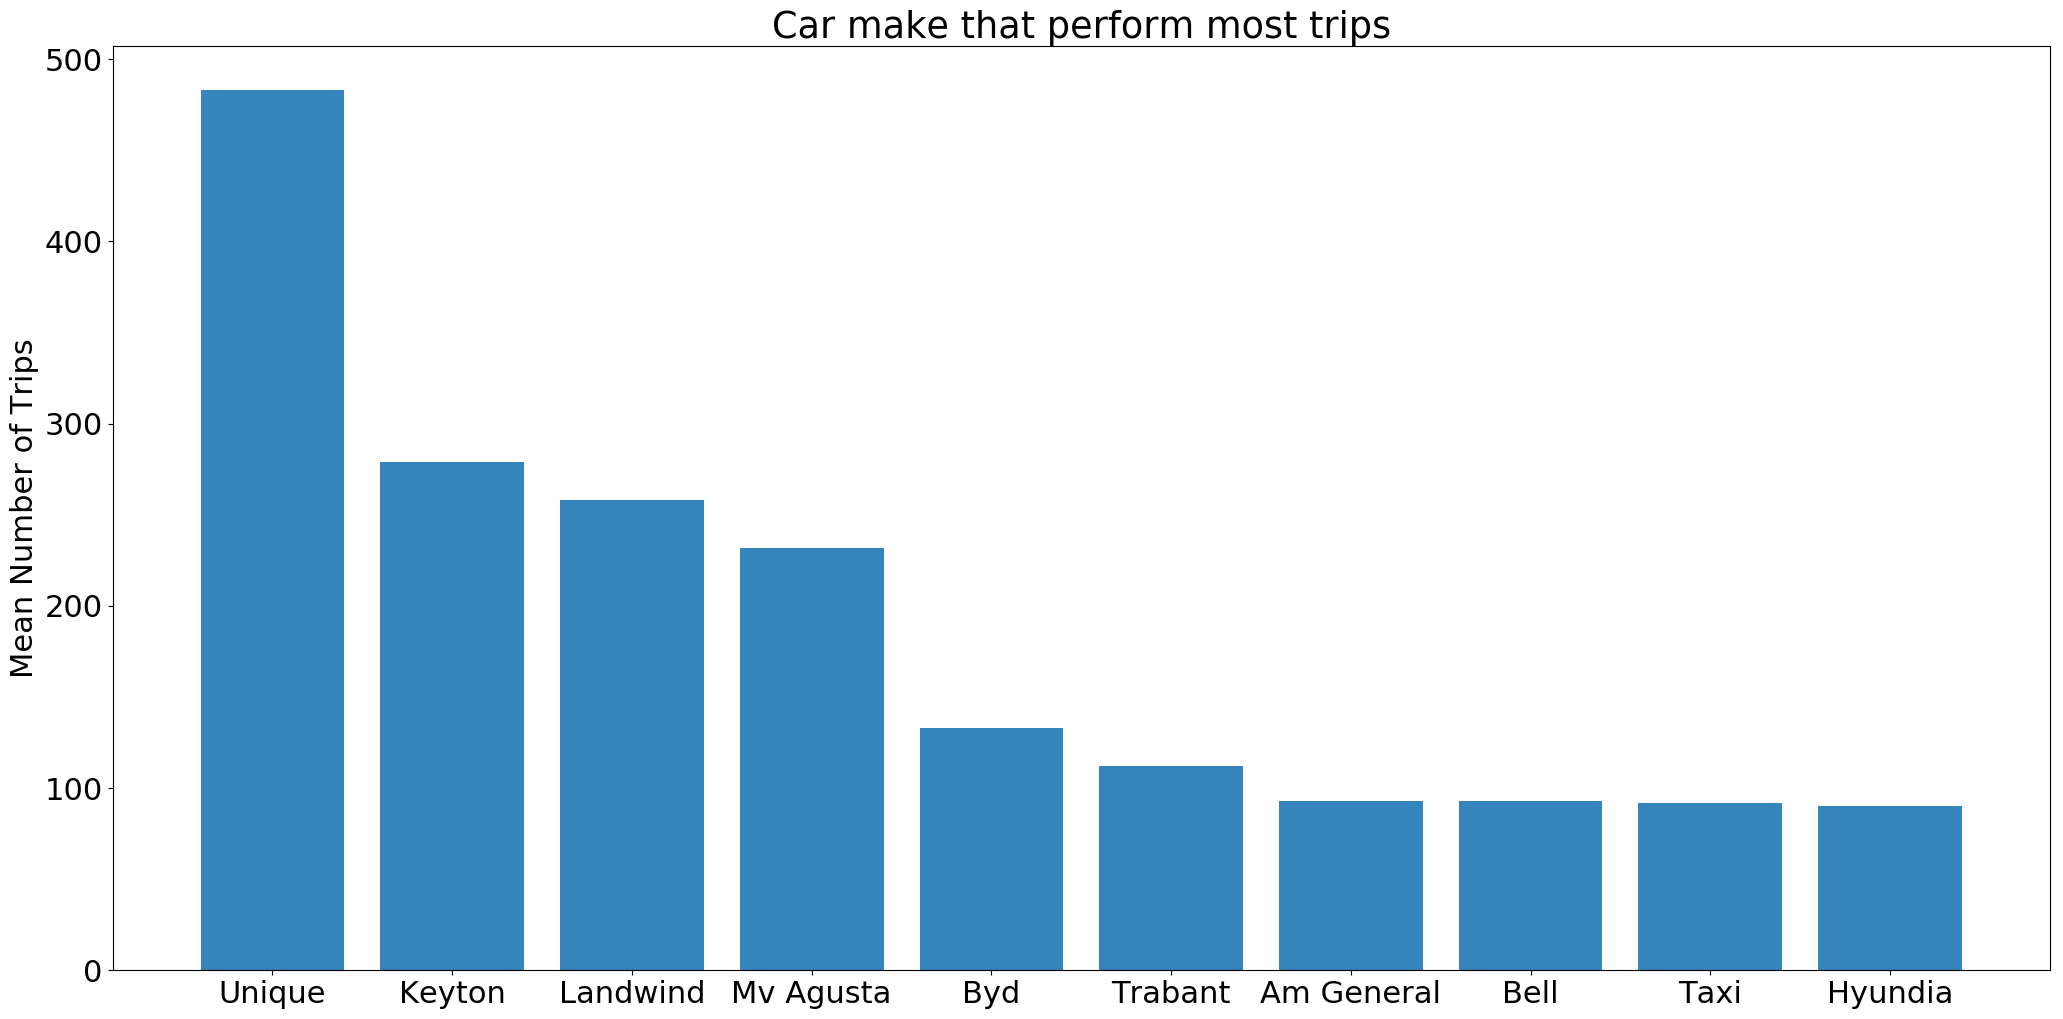

In [30]:
grouped_make = df_Vehicles[['MAKE','NUMBER_OF_TRIPS']].dropna().groupby(['MAKE']).agg(['mean','min','max'])
display(grouped_make.head())

objects = grouped_make['NUMBER_OF_TRIPS']['mean'].nlargest(10).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped_make['NUMBER_OF_TRIPS']['mean'].nlargest(10)

plt.figure(figsize=(25, 12))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Car make that perform most trips')

plt.show()

## Again I am not familiar with some of these car makes. Unique might keyword for undisclosed car make, however this info was not given in the data description. However it still suggest that sedan and SUV (4 seaters) cars are making the most trips assuming are preferred by the customers

NUMBER_OF_TRIPS            
                                 mean  min    max
LAST_INSPECTION_MONTH                            
2010-10                      0.000000  0.0    0.0
2011-04                      0.000000  0.0    0.0
2014-09                      0.250000  0.0    1.0
2014-11                     60.238095  0.0  360.0
2014-12                     10.561404  0.0  143.0

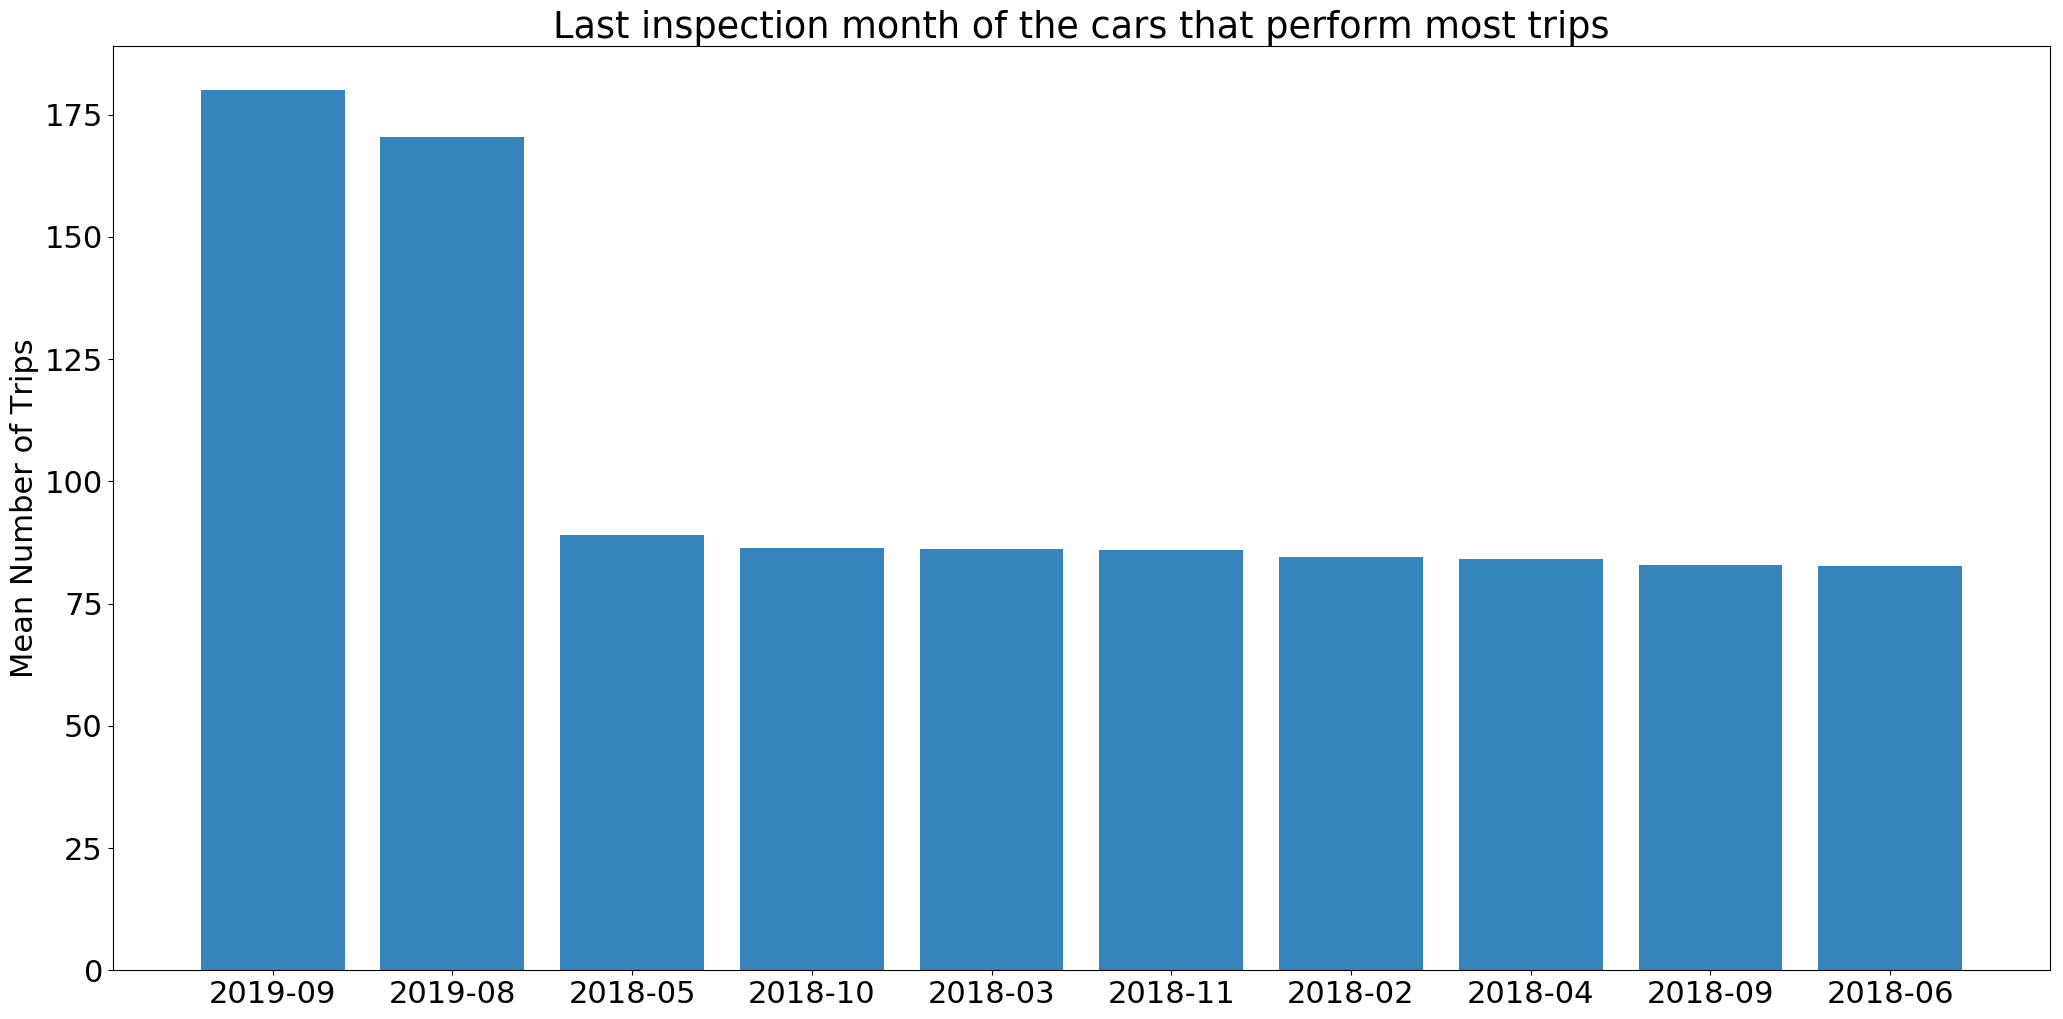

In [35]:
grouped_insp = df_Vehicles[['LAST_INSPECTION_MONTH','NUMBER_OF_TRIPS']].dropna().groupby(['LAST_INSPECTION_MONTH']).agg(['mean','min','max'])
display(grouped_insp.head())

objects = grouped_insp['NUMBER_OF_TRIPS']['mean'].nlargest(10).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped_insp['NUMBER_OF_TRIPS']['mean'].nlargest(10)

plt.figure(figsize=(25, 12))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Last inspection month of the cars that perform most trips')

plt.show()

## The cars that are making most trips are frequently inspected for compliance with city of Chicago rules. The data is reported in quarterlys after 2018. Suggests that either the drivers that make most trips make sure to that their cars are compliant against City of Chicago rules or that Drivers that are in compliance with City of Chicago rules run to less "hassles" that might prevent them from making more trips, for example getting ticketed?

# ------------------------------------------------------------------------------------------------------

# Transportation Network Providers - Trip data

In [37]:
# READING FIRST 1 MILLION ROWS AS OF NOW
df_Trips = pd.read_csv("Transportation_Network_Providers_-_Trips.csv", nrows=1000000)
df_Trips.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,999845.000000,1000000.000000,7.834590e+05,7.775160e+05,924995.000000,915573.000000,999996.000000,1000000.000000,999996.000000,999996.000000,1000000.000000,925732.000000,925732.000000,916222.000000,916222.000000
mean,1092.389692,6.211777,1.703136e+10,1.703138e+10,24.507748,25.312371,11.426853,0.577049,2.862366,14.866263,1.276666,41.895610,-87.665292,41.896250,-87.667839
std,793.976552,7.066162,3.350870e+05,3.417252e+05,19.917500,20.477104,10.033757,1.674404,1.950638,11.806066,0.699314,0.057176,0.061355,0.057583,0.065870
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,539.000000,1.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.500000,7.500000,1.000000,41.879255,-87.675312,41.879255,-87.676356
50%,873.000000,3.600000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.000000,2.500000,10.020000,1.000000,41.893216,-87.649907,41.893216,-87.649907
75%,1421.000000,7.700000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.000000,2.500000,17.500000,1.000000,41.929078,-87.631717,41.929273,-87.631717
max,47760.000000,273.600000,1.703198e+10,1.703198e+10,77.000000,77.000000,700.000000,100.000000,25.230000,702.050000,12.000000,42.021224,-87.531386,42.021224,-87.529950


In [38]:
df_Trips.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,022ad3b7f1320d4e52cce3d5931eb0a0cee16c48,11/01/2018 08:45:00 AM,11/01/2018 09:30:00 AM,3140.0,38.5,NaN,1.703198e+10,NaN,56.0,47.5,...,9.1,66.6,False,1,NaN,NaN,NaN,41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
1,0377167460a4d5d5e015c642b460e56ac88dab71,11/01/2018 02:00:00 AM,11/01/2018 02:15:00 AM,1031.0,5.3,NaN,NaN,70.0,NaN,10.0,...,2.5,12.5,False,1,41.745758,-87.708366,POINT (-87.7083657043 41.7457577128),NaN,NaN,NaN
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,11/01/2018 08:15:00 PM,11/01/2018 09:15:00 PM,4125.0,49.9,1.703108e+10,NaN,8.0,NaN,62.5,...,3.8,66.3,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),NaN,NaN,NaN
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,11/01/2018 03:45:00 AM,11/01/2018 04:15:00 AM,1229.0,11.7,1.703183e+10,NaN,22.0,NaN,7.5,...,2.5,10.0,True,3,41.916005,-87.675095,POINT (-87.6750951155 41.9160052737),NaN,NaN,NaN
4,040590c0bf5b22f8ccf7d8f19873c612bebfd480,11/01/2018 05:00:00 PM,11/01/2018 06:00:00 PM,3383.0,12.3,NaN,1.703184e+10,NaN,32.0,27.5,...,2.5,30.0,False,1,NaN,NaN,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [58]:
grouped_1 = df_Trips[['Trip Miles','Tip']].dropna().groupby(['Trip Miles']).agg(['mean'])
grouped_2 = df_Trips[['Trip Seconds','Tip']].dropna().groupby(['Trip Seconds']).agg(['mean'])
grouped_3 = df_Trips[['Trips Pooled','Tip']].dropna().groupby(['Trips Pooled']).agg(['mean'])
grouped_4 = df_Trips[['Fare','Tip']].dropna().groupby(['Fare']).agg(['mean'])
grouped_4.head()

,Tip
,mean
Fare,
0.0,0.054716
2.5,0.201613
5.0,0.298626
7.5,0.371717
10.0,0.427767


<Figure size 640x480 with 0 Axes>

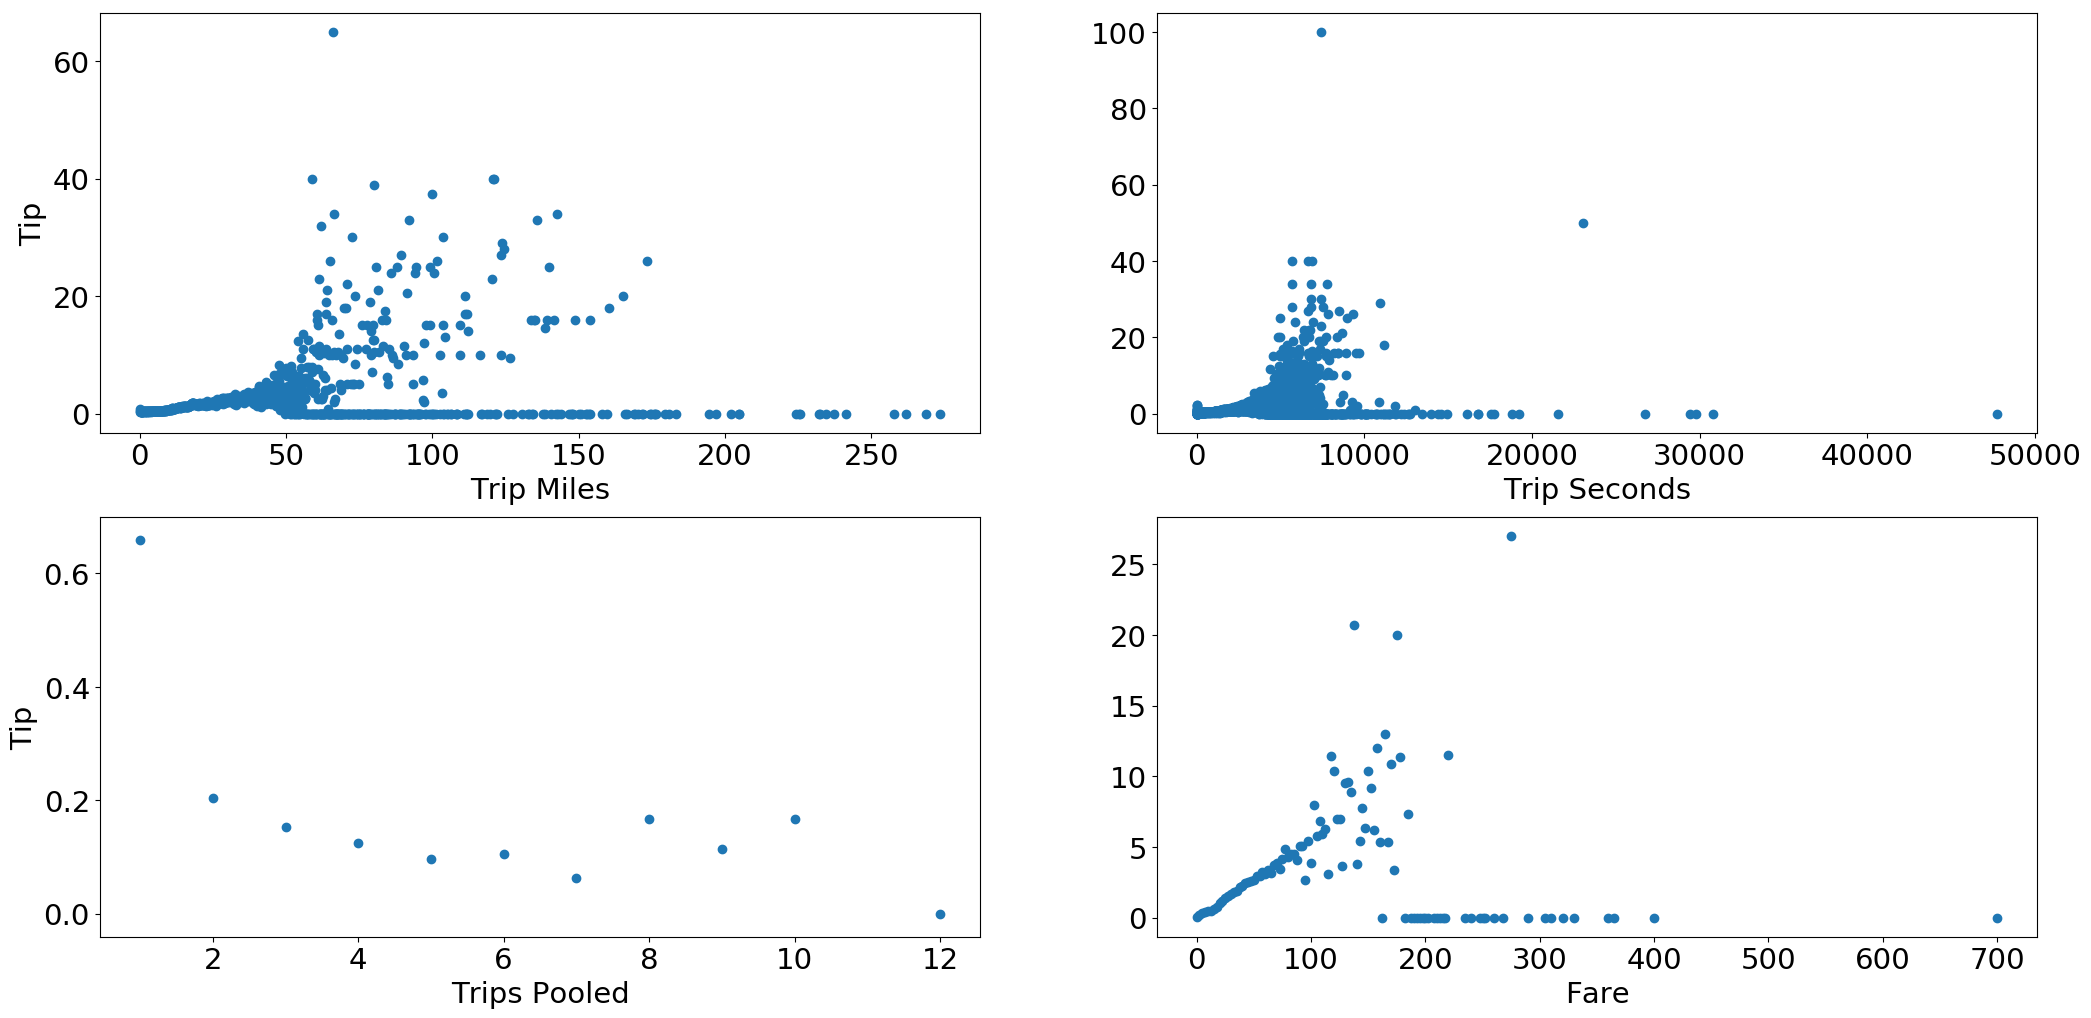

In [40]:
plt.rcParams.update({'font.size': 21})

x_1 = grouped_1.index
y_1 = grouped_1['Tip']['mean']

x_2 = grouped_2.index
y_2 = grouped_2['Tip']['mean']

x_3 = grouped_3.index
y_3 = grouped_3['Tip']['mean']

x_4 = grouped_4.index
y_4 = grouped_4['Tip']['mean']

fig = plt.figure()
plt.figure(figsize=(25, 12))

plt.subplot(2, 2, 1)
plt.scatter(x_1, y_1)
plt.ylabel('Tip')
plt.xlabel('Trip Miles')

plt.subplot(2, 2, 2)
plt.scatter(x_2, y_2)
plt.xlabel('Trip Seconds')

plt.subplot(2, 2, 3)
plt.scatter(x_3, y_3)
plt.ylabel('Tip')
plt.xlabel('Trips Pooled')

plt.subplot(2, 2, 4)
plt.scatter(x_4, y_4)
plt.xlabel('Fare')

fig.subplots_adjust(hspace=.9)

plt.show()

# An important part of income for drivers is Tips. Hence, it would be beneficial if drivers could be advised on performance in certain variables. Here, I am doing prelim simple analysis on effect of trips miles, seconds and people pooled and fare on Tips. The Tip values are the mean values.

# Some points: 
- With regards to trip miles and duration, it seems like there is a happy medium (blob area in first 2 subplots), below or above which leads to decrease in average Tip. 

- Counterintutively, more trips pooled lead to less mean Tips!! this is prob because the passengers are putting the responsibility of tipping to other person pooling and also might also be due to discomfort some passengers feel when sharing ride with strangers.

- With regards to fare, again there seems to be happy medium, above and below which passenger thinks that either trip was short enough to not warranty any tip or it was expensive enough that the passenger thinks they have paid enough for the ride service already.


# This was overall prelim analysis, more analysis needs to be done to get a complete picture that will show which variables should be considered by both drivers (to maximize profits and reputation) and passengers (fair tips, comfort and reliability). 

# ### FURTHER ANALYSIS AFTER CHALLENGE SUBMISSION

## removing some features that intutively will have less influence on Tips

In [67]:
df_Trips_CUT = df_Trips.drop(df_Trips.columns[[0, 2, 5, 6, 7, 8, 13, 17, 18, 19, 20]], axis=1)

df_Trips_CUT.dropna(subset=['Pickup Centroid Latitude','Pickup Centroid Longitude'], inplace=True)
df_Trips_CUT.reset_index(drop=True, inplace=True)

display(df_Trips_CUT.head())
display(df_Trips_CUT.tail())

,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude
0,11/01/2018 02:00:00 AM,1031.0,5.3,10.0,0,2.5,12.5,1,41.745758,-87.708366
1,11/01/2018 08:15:00 PM,4125.0,49.9,62.5,0,3.8,66.3,1,41.892042,-87.631864
2,11/01/2018 03:45:00 AM,1229.0,11.7,7.5,0,2.5,10.0,3,41.916005,-87.675095
3,11/01/2018 07:30:00 AM,653.0,2.4,5.0,0,2.5,7.5,1,41.745758,-87.708366
4,11/01/2018 09:30:00 PM,2142.0,24.1,27.5,5,2.5,35.0,1,41.892073,-87.628874


,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude
925727,11/09/2018 07:15:00 PM,308.0,0.9,0.0,0,2.5,2.5,3,41.867902,-87.642959
925728,11/13/2018 07:30:00 AM,958.0,3.9,7.5,0,2.5,10.0,1,41.745758,-87.708366
925729,11/17/2018 02:45:00 AM,656.0,3.1,7.5,0,2.5,10.0,1,41.928967,-87.656157
925730,11/24/2018 08:30:00 PM,385.0,1.2,7.5,3,2.8,13.3,1,41.893216,-87.637844
925731,11/02/2018 02:15:00 AM,483.0,3.1,7.5,0,2.5,10.0,1,41.885281,-87.657233


##  Extract Hour (24 hr format) and min from timestamp and added a feature column HrMin, for e.g. 22:14 is represented as 2214. 

In [68]:
%%time
df_Trips_CUT['HrMin'] = pd.to_datetime(df_Trips_CUT['Trip Start Timestamp']).dt.strftime(
    '%H%M').astype(str).astype(int)

df_Trips_CUT.drop(df_Trips_CUT.columns[[0]], axis=1, inplace=True)

df_Trips_CUT.dropna(inplace=True)
df_Trips_CUT.reset_index(drop=True, inplace=True)

display(df_Trips_CUT.head())
display(df_Trips_CUT.tail())

,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,HrMin
0,1031.0,5.3,10.0,0,2.5,12.5,1,41.745758,-87.708366,200
1,4125.0,49.9,62.5,0,3.8,66.3,1,41.892042,-87.631864,2015
2,1229.0,11.7,7.5,0,2.5,10.0,3,41.916005,-87.675095,345
3,653.0,2.4,5.0,0,2.5,7.5,1,41.745758,-87.708366,730
4,2142.0,24.1,27.5,5,2.5,35.0,1,41.892073,-87.628874,2130


,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,HrMin
925577,308.0,0.9,0.0,0,2.5,2.5,3,41.867902,-87.642959,1915
925578,958.0,3.9,7.5,0,2.5,10.0,1,41.745758,-87.708366,730
925579,656.0,3.1,7.5,0,2.5,10.0,1,41.928967,-87.656157,245
925580,385.0,1.2,7.5,3,2.8,13.3,1,41.893216,-87.637844,2030
925581,483.0,3.1,7.5,0,2.5,10.0,1,41.885281,-87.657233,215


Wall time: 1min 38s


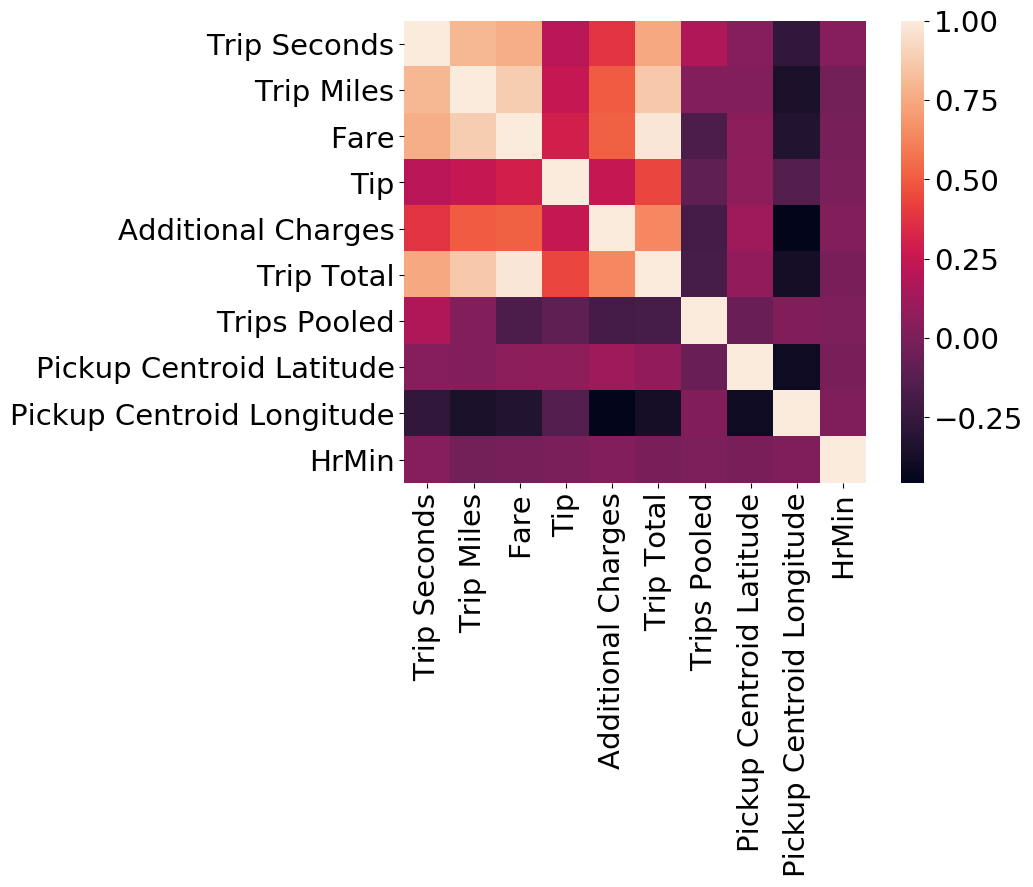

In [69]:
import seaborn as sns
corr = df_Trips_CUT.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data=corr, square=True)
plt.show()

## Trip miles and Trip total seems to have strong correlation, hence can remove Trip total as it's subsets are also taken into account through fares, tip and additional charges.

## Since tips are given after finishing of trip, I am assuming for now that trip time, miles, fare, and trips pooled might play stronger role in determining amount of tip. Hence, I'll remove other features

In [70]:
df_Trips_CUT.drop(df_Trips_CUT.columns[[4,5,7,8,9]], axis=1, inplace=True)

df_Trips_CUT.dropna(inplace=True)
df_Trips_CUT.reset_index(drop=True, inplace=True)

display(df_Trips_CUT.head())
display(df_Trips_CUT.tail())

,Trip Seconds,Trip Miles,Fare,Tip,Trips Pooled
0,1031.0,5.3,10.0,0,1
1,4125.0,49.9,62.5,0,1
2,1229.0,11.7,7.5,0,3
3,653.0,2.4,5.0,0,1
4,2142.0,24.1,27.5,5,1


,Trip Seconds,Trip Miles,Fare,Tip,Trips Pooled
925577,308.0,0.9,0.0,0,3
925578,958.0,3.9,7.5,0,1
925579,656.0,3.1,7.5,0,1
925580,385.0,1.2,7.5,3,1
925581,483.0,3.1,7.5,0,1


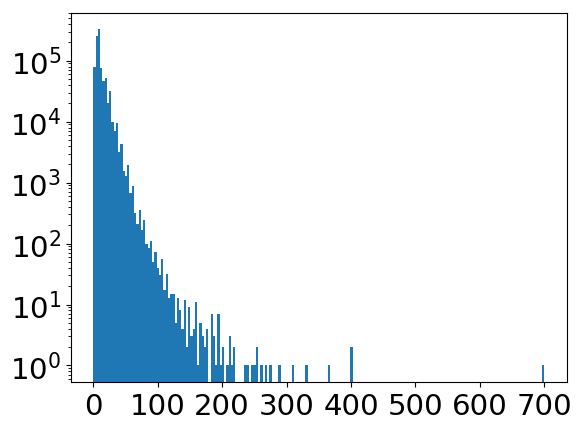

In [91]:
plt.hist(df_Trips_CUT['Fare'],bins=200,log=True)
plt.xticks(np.arange(min(df_Trips_CUT['Fare']), max(df_Trips_CUT['Fare'])+1, 100.0))
plt.show()

## Seems we can remove fare values more than 100!!

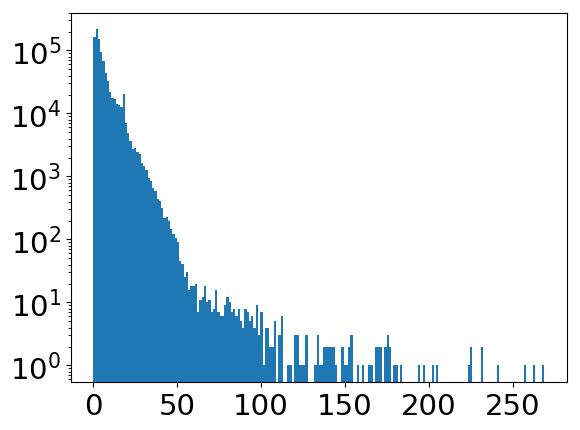

In [86]:
plt.hist(df_Trips_CUT['Trip Miles'],bins=200,log=True) 
plt.xticks(np.arange(min(df_Trips_CUT['Trip Miles']), max(df_Trips_CUT['Trip Miles'])+1, 50.0))
plt.show()

## seems like can remove trip miles values more than 50

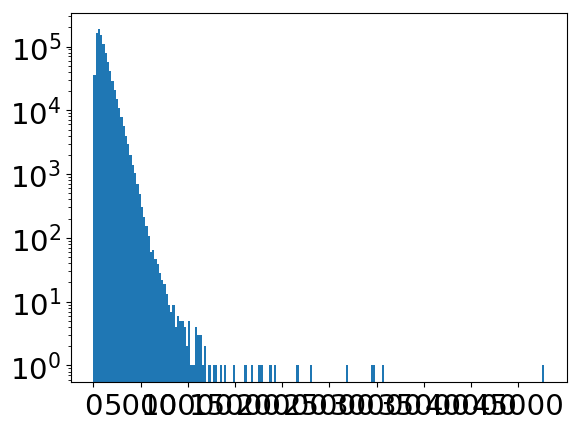

In [97]:
plt.hist(df_Trips_CUT['Trip Seconds'],bins=200,log=True) 
plt.xticks(np.arange(min(df_Trips_CUT['Trip Seconds']), max(df_Trips_CUT['Trip Seconds'])+1, 5000.0))
plt.show()

## seems like can remove trip seconds values more than 5000

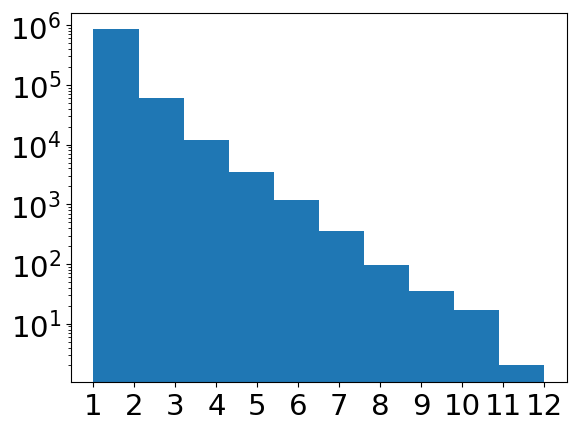

In [104]:
plt.hist(df_Trips_CUT['Trips Pooled'],bins=10,log=True) 
plt.xticks(np.arange(min(df_Trips_CUT['Trips Pooled']), max(df_Trips_CUT['Trips Pooled'])+1, 1.0))
plt.show()

## seems like can remove Trips pooled values more than 8

In [147]:
df_rm_outliers = df_Trips_CUT[df_Trips_CUT['Fare'] <= 50]
df_rm_outliers = df_rm_outliers[df_rm_outliers['Trip Miles'] <= 25]
df_rm_outliers = df_rm_outliers[df_rm_outliers['Trip Seconds'] <= 1000]
df_rm_outliers = df_rm_outliers[df_rm_outliers['Trips Pooled'] <= 6]

df_rm_outliers.reset_index(drop=True, inplace=True)

display(df_rm_outliers.head())
print(df_rm_outliers.shape[0])

,Trip Seconds,Trip Miles,Fare,Tip,Trips Pooled
0,653.0,2.4,5.0,0,1
1,843.0,10.8,12.5,0,1
2,383.0,1.2,7.5,0,1
3,374.0,1.5,5.0,0,1
4,937.0,4.7,10.0,0,1


559999


## scaling the feature values as some weights might have dominate just due to having larger values

In [148]:
# scaling and transforming trip data
scaler = StandardScaler()

scaled_trip_features_df = pd.DataFrame(scaler.fit(df_rm_outliers).transform(df_rm_outliers), index=df_rm_outliers.index, 
                                  columns=df_rm_outliers.columns)

display(scaled_trip_features_df.head())

# save the scaler
scaler_filename = "scaler_trip_data.save"
joblib.dump(scaler, scaler_filename) 

# save in pickle format
scaled_trip_features_df.to_pickle('scaled_trip_data_df.pkl')

C:\Users\Vik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,Trip Seconds,Trip Miles,Fare,Tip,Trips Pooled
0,0.301904,-0.037239,-0.504333,-0.352864,-0.317085
1,1.140220,4.928838,2.102034,-0.352864,-0.317085
2,-0.889387,-0.746678,0.364456,-0.352864,-0.317085
3,-0.929096,-0.569318,-0.504333,-0.352864,-0.317085
4,1.554965,1.322520,1.233245,-0.352864,-0.317085


In [149]:
# splitting into training and testing set for tips

X_test_tip = scaled_trip_features_df.tail(10000).drop(['Tip'], axis=1)
Y_test_tip = scaled_trip_features_df.tail(10000)["Tip"]

N_rows = scaled_trip_features_df.shape[0]-10000
X_tip = scaled_trip_features_df.head(N_rows).drop(['Tip'], axis=1)
y_tip = scaled_trip_features_df.head(N_rows)["Tip"]
display(X_tip.head())
display(y_tip.head())

,Trip Seconds,Trip Miles,Fare,Trips Pooled
0,0.301904,-0.037239,-0.504333,-0.317085
1,1.140220,4.928838,2.102034,-0.317085
2,-0.889387,-0.746678,0.364456,-0.317085
3,-0.929096,-0.569318,-0.504333,-0.317085
4,1.554965,1.322520,1.233245,-0.317085


0   -0.352864
1   -0.352864
2   -0.352864
3   -0.352864
4   -0.352864
Name: Tip, dtype: float64

In [151]:
# splitting into training and validation set
x_train,x_val,y_train,y_val = train_test_split(X_tip,y_tip, test_size=0.20, random_state=12)
print(len(x_train))
print(X_tip.shape[1])

439999
4


## First we look at simple linear model, how these features contribute to tip values

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(x_train,y_train)

# Make predictions using the validation set
tip_pred = reg.predict(X_test_tip)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test_tip, tip_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y_test_tip, tip_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test_tip, tip_pred))

Coefficients: 
 [ 0.00926942 -0.0840203   0.15109697 -0.02926113]
Mean squared error: 0.88
Root Mean squared error: 0.94
Variance score: 0.02


## Linear model does not model the tips obtained by drivers well !!

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf') ##, C=100, gamma=0.1, epsilon=.1
svr_rbf.fit(x_train, y_train)
tip_pred = svr_rbf.predict(X_test_tip)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test_tip, tip_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y_test_tip, tip_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test_tip, tip_pred))

C:\Users\Vik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# ### Deep neural net regression model

In [ ]:
# DEEP NEURAL NETWORK ARCHITECTURE DEFINED HERE!

from keras.optimizers import Adam

model = Sequential()
model.add(Dense(units = 6, kernel_initializer='normal', activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 3, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(units = 1))

adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(loss='mean_squared_error', optimizer=adam)
checkpointer = ModelCheckpoint(filepath="DNN_best_weights.hdf5", verbose=1,save_best_only=True) # save the best model
model.summary()

In [ ]:
%%time
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[checkpointer],verbose=1,epochs=10,
                    batch_size = 10)